# Dataset analysis

In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))
print("Are GPUs available:", tf.test.is_gpu_available())
print("Is Built With CUDA:", tf.test.is_built_with_cuda())

Num GPUs: 0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Are GPUs available: False
Is Built With CUDA: False


In [2]:
import os

os.environ['TF_GPU_DEVICE'] = 'True'

# Balanced

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Resizing, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.metrics import Precision, Recall


model_0 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

train_ds = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_0 = model_0.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_0.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 81s 506ms/step - loss: 0.4670 - accuracy: 0.8496 - val_loss: 0.4584 - val_accuracy: 0.8380
Epoch 2/30
157/157 [==============================] - 78s 498ms/step - loss: 0.0690 - accuracy: 0.9776 - val_loss: 2.6473 - val_accuracy: 0.5340
Epoch 3/30
157/157 [==============================] - 79s 503ms/step - loss: 0.0705 - accuracy: 0.9738 - val_loss: 1.1774 - val_accuracy: 0.6415
Epoch 4/30
157/157 [==============================] - 78s 495ms/step - loss: 0.0601 - accuracy: 0.9792 - val_loss: 0.7186 - val_accuracy: 0.7900
Epoch 5/30
157/157 [==============================] - 88s 562ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.1148 - val_accuracy: 0.9540
Epoch 6/30
157/157 [==============================] - 114s 728ms/step - loss: 0.0406 - accuracy: 0.9858 - val_loss: 0.3112 - val_accuracy: 0.8685
Epoch 

# Unbalanced

In [4]:
model_1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=2),
    
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=1),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=1),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(strides=1),
    
    Dropout(.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

imbalance_ratios = [0.9, 0.7, 0.3, 0.3, 0.3]
imb_dataset = []

for batch, labels in train_ds_bal:
    for image, label in zip(batch, labels):
        label_index = np.argmax(label.numpy())
        if np.random.rand() < imbalance_ratios[label_index]:
            imb_dataset.append((image, label))
            
imb_images, imb_labels = zip(*imb_dataset)  # This separates the images and labels
imb_images = tf.stack(imb_images)
imb_labels = tf.stack(imb_labels)

train_ds_imb = tf.data.Dataset.from_tensor_slices((imb_images, imb_labels)).batch(32)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = model_1.fit(
    train_ds_imb,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_1.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
79/79 [==============================] - 140s 2s/step - loss: 5.9334 - accuracy: 0.7564 - val_loss: 6.1914 - val_accuracy: 0.6740
Epoch 2/30
79/79 [==============================] - 142s 2s/step - loss: 1.3695 - accuracy: 0.8989 - val_loss: 1.2887 - val_accuracy: 0.8905
Epoch 3/30
79/79 [==============================] - 140s 2s/step - loss: 0.5957 - accuracy: 0.9467 - val_loss: 1.0178 - val_accuracy: 0.9105
Epoch 4/30
79/79 [==============================] - 144s 2s/step - loss: 0.9332 - accuracy: 0.9224 - val_loss: 3.4055 - val_accuracy: 0.7850
Epoch 5/30
79/79 [==============================] - 144s 2s/step - loss: 0.4558 - accuracy: 0.9423 - val_loss: 2.9817 - val_accuracy: 0.7940
Epoch 6/30
79/79 [==============================] - 144s 2s/step - loss: 0.3916 - accuracy: 0.9427 - val_loss: 0.6029 - val_accuracy: 0.9140
Epoch 7/30
79/79 [=============

# Model 1: Adadelta & selu

In [5]:
model_2 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('selu'),
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('selu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3),),
    BatchNormalization(),
    Activation('selu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3),),
    BatchNormalization(),
    Activation('selu'),
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='selu'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_2.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

history_2 = model_2.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_2.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 82s 518ms/step - loss: 2.4845 - accuracy: 0.2356 - val_loss: 1.6795 - val_accuracy: 0.3260
Epoch 2/30
157/157 [==============================] - 81s 517ms/step - loss: 1.6329 - accuracy: 0.3460 - val_loss: 1.2323 - val_accuracy: 0.4775
Epoch 3/30
157/157 [==============================] - 82s 520ms/step - loss: 1.3335 - accuracy: 0.4488 - val_loss: 1.0260 - val_accuracy: 0.6140
Epoch 4/30
157/157 [==============================] - 81s 519ms/step - loss: 1.1654 - accuracy: 0.5264 - val_loss: 0.8859 - val_accuracy: 0.6800
Epoch 5/30
157/157 [==============================] - 82s 520ms/step - loss: 1.0210 - accuracy: 0.5808 - val_loss: 0.7838 - val_accuracy: 0.7475
Epoch 6/30
157/157 [==============================] - 83s 527ms/step - loss: 0.9221 - accuracy: 0.6288 - val_loss: 0.7036 - val_accuracy: 0.7900
Epoch 7

# Model 2: Nadam & signmoid

In [6]:
model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('sigmoid'),
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='sigmoid'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_3.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history_3 = model_3.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_3.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 82s 505ms/step - loss: 0.8072 - accuracy: 0.7860 - val_loss: 1.8071 - val_accuracy: 0.2760
Epoch 2/30
157/157 [==============================] - 79s 505ms/step - loss: 0.2478 - accuracy: 0.9624 - val_loss: 1.8639 - val_accuracy: 0.2985
Epoch 3/30
157/157 [==============================] - 80s 507ms/step - loss: 0.1170 - accuracy: 0.9852 - val_loss: 1.8363 - val_accuracy: 0.4060
Epoch 4/30
157/157 [==============================] - 79s 505ms/step - loss: 0.1023 - accuracy: 0.9812 - val_loss: 1.7346 - val_accuracy: 0.5205
Epoch 5/30
157/157 [==============================] - 81s 513ms/step - loss: 0.0549 - accuracy: 0.9932 - val_loss: 1.1617 - val_accuracy: 0.6055
Epoch 6/30
157/157 [==============================] - 81s 517ms/step - loss: 0.0637 - accuracy: 0.9868 - val_loss: 1.5732 - val_accuracy: 0.4165
Epoch 7

# Adamax & ELU

In [7]:
model_4 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling2D(strides=2),
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling2D(strides=2),
    Dropout(.2),
    Flatten(),
    Dense(32, activation='elu'),
    Dense(5, activation='softmax')
])

train_ds_bal = keras.utils.image_dataset_from_directory(
    "./data_sorted/training", 
    batch_size=32, 
    image_size=(128, 128),
    shuffle=True,
    label_mode="categorical"
)

val_data = keras.utils.image_dataset_from_directory(
    './data_sorted/validation',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

test_ds = keras.utils.image_dataset_from_directory(
    './data_sorted/testing',
    image_size=(128, 128), 
    batch_size=32,
    shuffle=True,
    label_mode="categorical"
)

model_4.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history_4 = model_4.fit(
    train_ds,
    validation_data=val_data,
    epochs=30
)

loss, accuracy = model_4.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"metrics: {accuracy*100:.4f}%")

Found 5000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.
Epoch 1/30
157/157 [==============================] - 83s 511ms/step - loss: 0.2472 - accuracy: 0.9190 - val_loss: 0.2782 - val_accuracy: 0.8755
Epoch 2/30
157/157 [==============================] - 80s 513ms/step - loss: 0.0537 - accuracy: 0.9820 - val_loss: 0.0442 - val_accuracy: 0.9835
Epoch 3/30
157/157 [==============================] - 81s 513ms/step - loss: 0.0455 - accuracy: 0.9846 - val_loss: 1.1024 - val_accuracy: 0.7030
Epoch 4/30
157/157 [==============================] - 81s 513ms/step - loss: 0.0468 - accuracy: 0.9832 - val_loss: 0.3971 - val_accuracy: 0.8585
Epoch 5/30
157/157 [==============================] - 82s 521ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.2630 - val_accuracy: 0.9140
Epoch 6/30
157/157 [==============================] - 82s 519ms/step - loss: 0.0383 - accuracy: 0.9866 - val_loss: 3.2052 - val_accuracy: 0.7095
Epoch 7

In [10]:
import pickle

histories = []
histories.append(history_0)
histories.append(history_1)
histories.append(history_2)
histories.append(history_3)
histories.append(history_4)

history_names = ['Balanced', 'Unbalanced', 'AdaDelta & SELU', 'Nadam & Sigmoid', 'Adamax & ELU']

# Convert histories to a dictionary format for easier saving and retrieval
histories_dict = {name: history.history for history, name in zip(histories, history_names)}

# Save histories to a file
with open('training_histories.pkl', 'wb') as file:
    pickle.dump(histories_dict, file)

print("Histories saved successfully!")

Histories saved successfully!


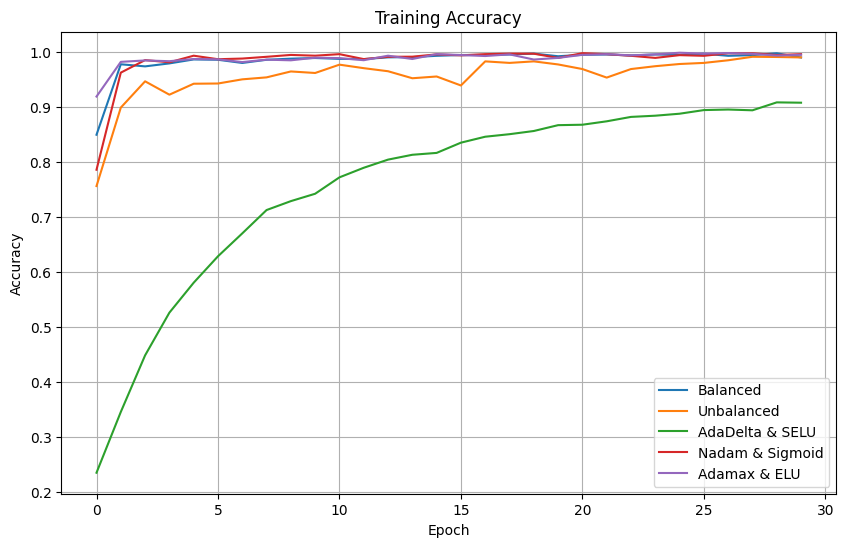

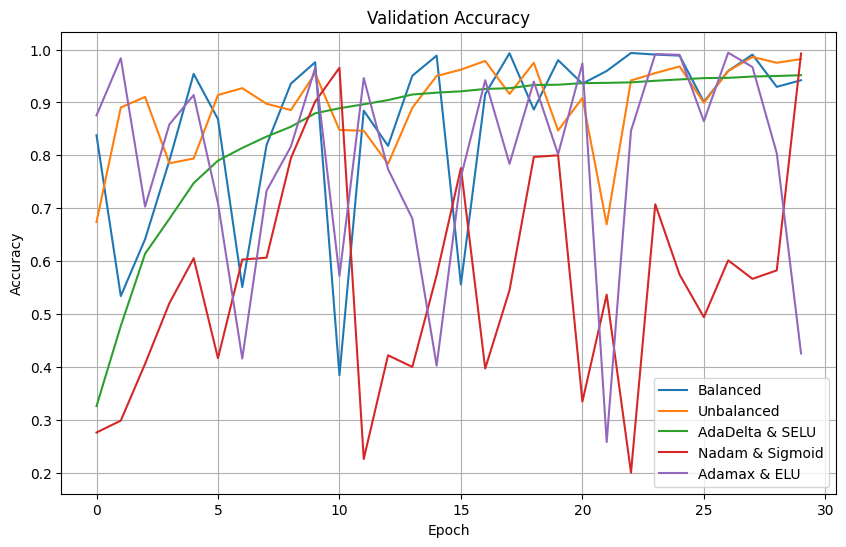

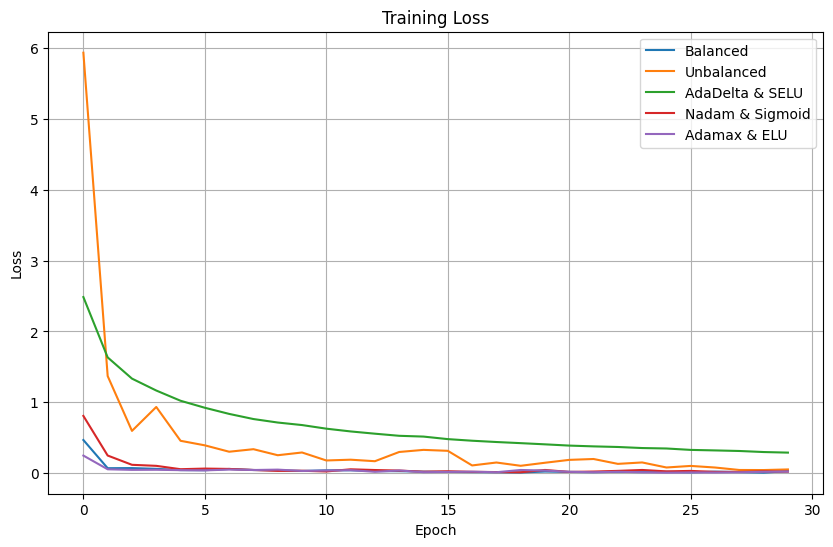

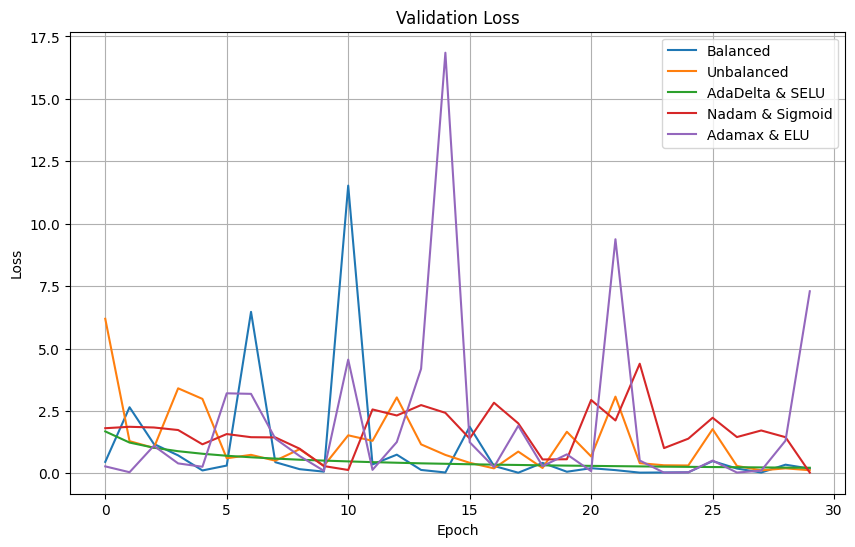

In [24]:
import matplotlib.pyplot as plt

# Plotting Training Accuracy
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['accuracy'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Validation Accuracy
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plotting Training Loss
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['loss'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plotting Validation Loss
plt.figure(figsize=(10, 6))
for history, name in zip(histories, history_names):
    plt.plot(history.history['val_loss'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

plt.show()

# Save Models

In [12]:
models = []
models.append(model_0)
models.append(model_1)
models.append(model_2)
models.append(model_3)
models.append(model_4)

model_dir = 'trained_models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

for idx, model in enumerate(models):
    model.save(f'trained_models/model_{idx}')

INFO:tensorflow:Assets written to: trained_models/model_0\assets


INFO:tensorflow:Assets written to: trained_models/model_0\assets


INFO:tensorflow:Assets written to: trained_models/model_1\assets


INFO:tensorflow:Assets written to: trained_models/model_1\assets


INFO:tensorflow:Assets written to: trained_models/model_2\assets


INFO:tensorflow:Assets written to: trained_models/model_2\assets


INFO:tensorflow:Assets written to: trained_models/model_3\assets


INFO:tensorflow:Assets written to: trained_models/model_3\assets


INFO:tensorflow:Assets written to: trained_models/model_4\assets


INFO:tensorflow:Assets written to: trained_models/model_4\assets


# Load Models

In [ ]:
# import tensorflow as tf
# import os

# # Directory where models are saved
# models_directory = 'trained_models'

# # Get list of model directories or files in the 'trained_models' folder
# model_paths = [os.path.join(models_directory, model_name) for model_name in os.listdir(models_directory)]

# # Initialize an empty list to store the loaded models
# loaded_models = []

# # Load each model
# for model_path in model_paths:
#     # Check if the model is in SavedModel format by looking for the 'saved_model.pb' file
#     if os.path.isdir(model_path) and 'saved_model.pb' in os.listdir(model_path):
#         model = tf.keras.models.load_model(model_path)
#         loaded_models.append(model)
#     # Check if the model is in HDF5 format by looking for the '.h5' extension
#     elif model_path.endswith('.h5'):
#         model = tf.keras.models.load_model(model_path)
#         loaded_models.append(model)

# print(f"Loaded {len(loaded_models)} models from '{models_directory}' directory.")


# Display Intermediate Activations

1/1 [==============================] - 0s 158ms/step


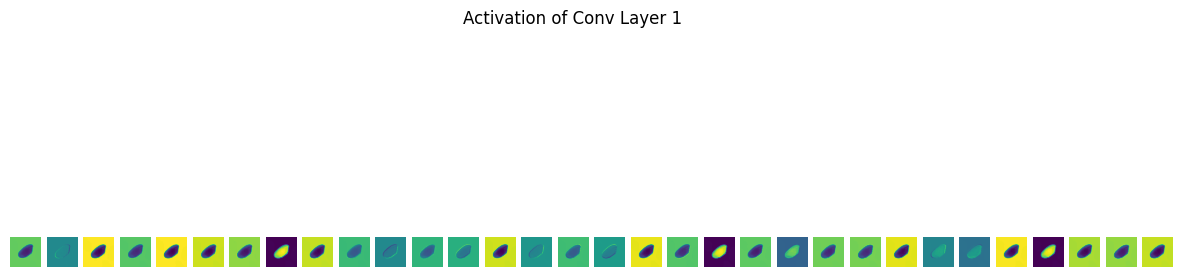

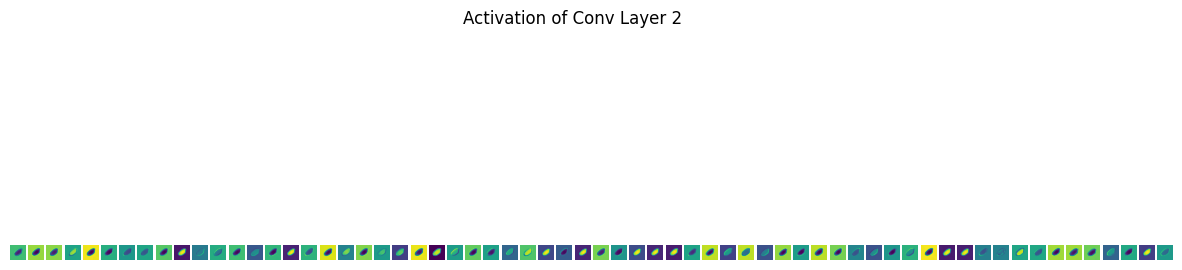

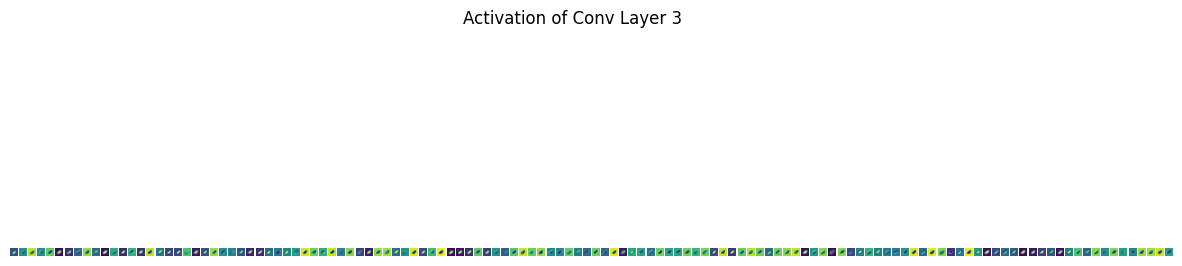

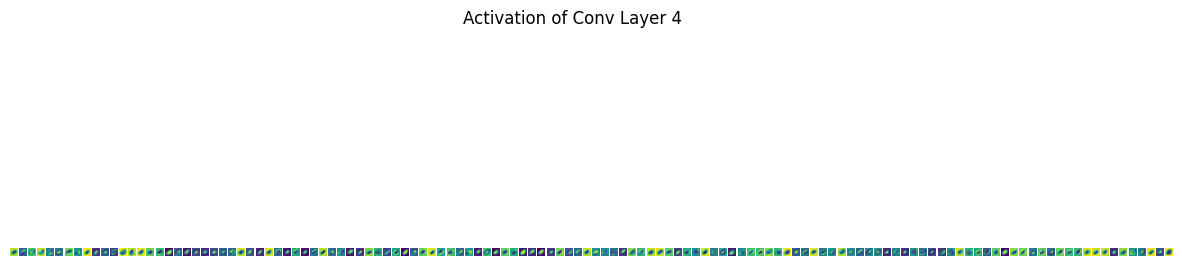

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os

# Get the current working directory using IPython magic command
current_directory = %pwd

# Create the path relative to the current directory
image_path = os.path.join(current_directory, 'data_sorted', 'testing', 'Arborio', 'Arborio (65).jpg')

# Load the image using the created path


image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

# Expand dimensions for batch size
image_tensor = tf.expand_dims(image_tensor, axis=0)

# If needed, normalize the image tensor values to [0, 1]
image_tensor = image_tensor / 255.0


# Assuming img_tensor is your input image tensor
# Reshape the image tensor to the appropriate shape if necessary, for example: img_tensor = img_tensor.reshape(1, 128, 128, 3)

layer_outputs = [layer.output for layer in model_4.layers if 'conv' in layer.name]  # Only get conv layers
activation_model = Model(inputs=model_4.input, outputs=layer_outputs)
activations = activation_model.predict(image_tensor)

# Display the activations from the convolutional layers
for i, activation in enumerate(activations):
    plt.figure(figsize=(15, 5))
    for j in range(activation.shape[-1]):
        plt.subplot(1, activation.shape[-1], j+1)
        plt.imshow(activation[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Activation of Conv Layer {i + 1}")
    plt.show()

# Visualize Convolutional Filters

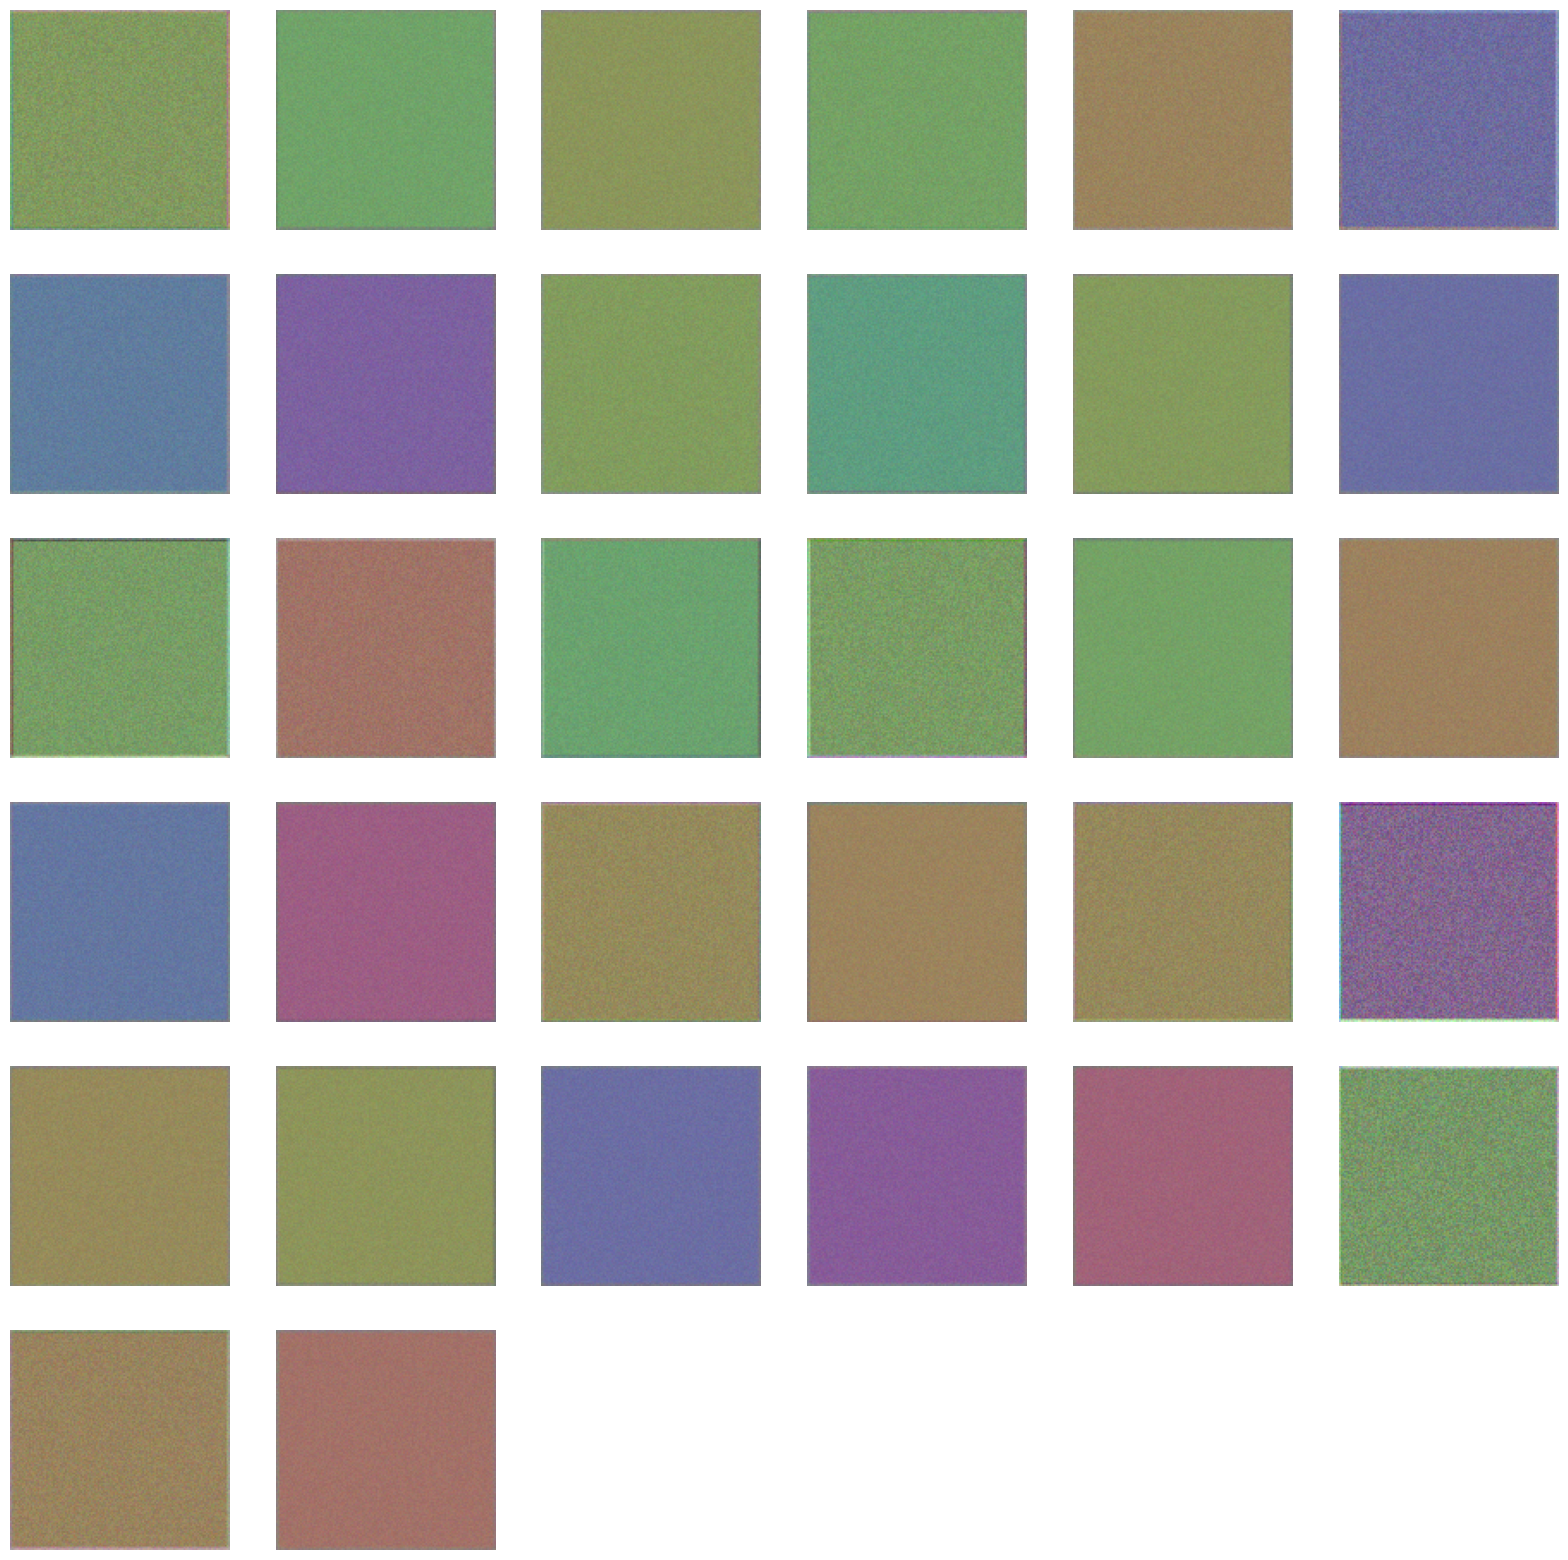

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def get_activations(model, layer_name, input_image):
    """Helper function to get activations of a specific layer for a given input image."""
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                     outputs=model.get_layer(layer_name).output)
    intermediate_layer_model.trainable = False
    return intermediate_layer_model(input_image)

def generate_pattern(layer_name, filter_index, size=128):
    input_img_data = tf.Variable(np.random.random((1, size, size, 3)) * 20 + 128., dtype=tf.float32)
    step = 1.
    
    for _ in range(40):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            activations = get_activations(model_4, layer_name, input_img_data)
            loss_value = tf.keras.backend.mean(activations[:, :, :, filter_index])
            
        grads_value = tape.gradient(loss_value, input_img_data)
        
        norm_grads = tf.sqrt(tf.reduce_mean(tf.square(grads_value))) + 1e-5
        grads_value /= norm_grads
        input_img_data.assign_add(grads_value * step)
        
    img = input_img_data.numpy()[0]
    return deprocess_image(img)

# Visualize some filters for the first convolutional layer
plt.figure(figsize=(20, 20))
for i in range(32):  # 32 filters in the first convolutional layer
    filter_img = generate_pattern('conv2d_16', i)
    plt.subplot(6, 6, i+1)
    plt.imshow(filter_img)
    plt.axis('off')
plt.show()
